In [2]:
from thesis.config import *
from thesis.thesis_utils import load_p
from core.id_detection.feature_manager import FeatureManager
from utils.video_manager import get_auto_video_manager
import matplotlib.pyplot as plt
from utils.drawing.points import draw_points_crop
from utils.img import get_safe_selection
import cv2
from core.id_detection.features import get_idtracker_features
from core.region.clustering import draw_region
import matplotlib.gridspec as gridspec
from PyQt4 import QtGui
from utils.drawing.points import draw_points
import cPickle as pickle
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [73]:
line_styles = ['', '-', '--', ':', '-.']
features = ['', 'f1', 'f2', 'f3', 'f4']
patches = []
plt.close()
plt.figure()
ax = plt.subplot(111)
for var in [1, 2, 3, 4]:
    with open(DEV_WD+'/thesis/results/clustering_k_f'+str(var)+'.pkl') as f:
        results, fch = pickle.load(f)

    Ns = results['Ns']
    
    patches.append(mlines.Line2D([], [], color='k',
                              markersize=7, label=features[var], linestyle=line_styles[var]))
    
    c_pers = {}
    x = np.array(range(len(Ns)))
    
    min_ = 100
    for i, pname in enumerate(project_paths.keys()):
        cs, ms = results[pname]
        c_percentages = [100*c/float(c+m) for c, m in zip(cs, ms)]
        
        min_ = min(min_, min(c_percentages))
        c_pers[pname] = c_percentages
        
        if var == 4:
            patches.append(mlines.Line2D([], [], color=project_colors[pname], marker=project_marks[pname],
                              markersize=7, label=project_real_names[pname]))
        
    plt.hold(True)
    for pname in project_paths.keys():
        ms = 16
        if var == 3:
            ms = 20
        
    
        plt.plot(Ns, c_pers[pname], lw=1.0, color=project_colors[pname], linestyle=line_styles[var])
        plt.scatter(Ns, c_pers[pname], c=project_colors[pname], marker=project_marks[pname],
                    s=ms
                    )

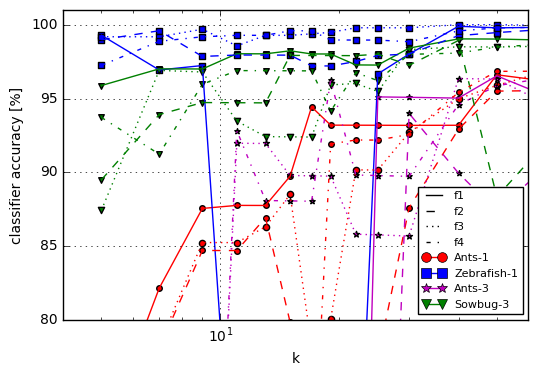

In [74]:
ax.set_ylim([30, 101])
ax.set_xlim([4.5, 213])
ax.set_xscale("log", nonposx='clip')
plt.legend(handles=patches, loc=4, fontsize=8)
plt.ylabel('classifier accuracy [%]')
plt.xlabel('k')
plt.grid(True)

plt.savefig(OUT_IMGS_WD+'/region_classifier_k_dependence_plot_log.png', bbox_inches='tight', dpi=256)

ax.set_ylim([80, 101])
ax.set_xlim([4, 60])

plt.savefig(OUT_IMGS_WD+'/region_classifier_k_dependence_plot_zoom_log.png', bbox_inches='tight', dpi=512)
plt.show()

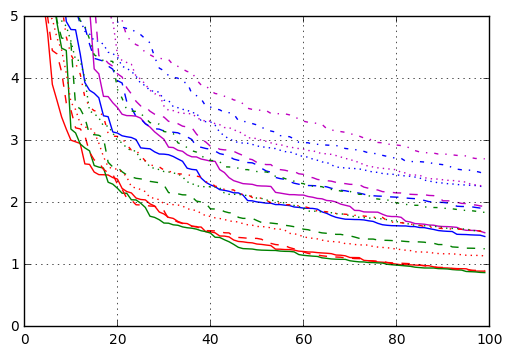

In [55]:
plt.figure()
ax = plt.subplot(111)
for var in [1, 2, 3, 4]:
    with open(DEV_WD+'/thesis/results/clustering_k_d'+str(var)+'.pkl') as f:
        dist, fch = pickle.load(f)
    
    for i, pname in enumerate(['Cam1', 'Zebrafish', 'Camera3', 'Sowbug3']):
        plt.plot(dist[pname][:100], color=project_colors[pname], linestyle=line_styles[var])

plt.grid(True)
ax.set_ylim([0, 5])
plt.show()